In [1]:
# Import packages
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Import MlFinLab package
import mlfinlab as ml

In [2]:
# Read data
data = pd.read_csv('./tutorial_data/ES_Trades/ES_Trades.csv')
data.head()

,Symbol,Date,Time,Price,Volume,Market Flag,Sales Condition,Exclude Record Flag,Unfiltered Price
0,ESU13,09/01/2013,17:00:00.083,1640.25,8,E,0,NaN,1640.25
1,ESU13,09/01/2013,17:00:00.083,1640.25,1,E,0,NaN,1640.25
2,ESU13,09/01/2013,17:00:00.083,1640.25,2,E,0,NaN,1640.25
3,ESU13,09/01/2013,17:00:00.083,1640.25,1,E,0,NaN,1640.25
4,ESU13,09/01/2013,17:00:00.083,1640.25,1,E,0,NaN,1640.25


In [3]:
# Format the Data
date_time = data['Date'] + ' ' + data['Time'] # Dont convert to datetime here, it will take forever to convert.
new_data = pd.concat([date_time, data['Price'], data['Volume']], axis=1)
new_data.columns = ['date', 'price', 'volume']
print(new_data.head())
print('\n')
print('Rows:', new_data.shape[0])

                      date    price  volume
0  09/01/2013 17:00:00.083  1640.25       8
1  09/01/2013 17:00:00.083  1640.25       1
2  09/01/2013 17:00:00.083  1640.25       2
3  09/01/2013 17:00:00.083  1640.25       1
4  09/01/2013 17:00:00.083  1640.25       1


Rows: 5454950


In [4]:
# Save to csv
new_data.to_csv('./tutorial_data/raw_tick_data.csv', index=False)

In [5]:
print('Creating Dollar Bars')
dollar = ml.data_structures.get_dollar_bars('tutorial_data/raw_tick_data.csv', threshold=70000000,
                                            batch_size=1000000, verbose=True)

print('Creating Volume Bars')
volume = ml.data_structures.get_volume_bars('tutorial_data/raw_tick_data.csv', threshold=28000,
                                            batch_size=1000000, verbose=False)

print('Creating Tick Bars')
tick = ml.data_structures.get_tick_bars('tutorial_data/raw_tick_data.csv', threshold=5500,
                                        batch_size=1000000, verbose=False)

Creating Dollar Bars
Reading data in batches:
Batch number: 0
Batch number: 1
Batch number: 2
Batch number: 3
Batch number: 4
Batch number: 5
Returning bars 

Creating Volume Bars
Creating Tick Bars


In [21]:
# Confirm the dollar sampling
dollar['value'] = dollar['close'] * dollar['volume']
dollar.head()

,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value,value
0,2013-09-01 21:34:39.298,11207,1640.25,1643.5,1639.00,1640.75,42862,21896,11207,70347610.00,70325826.5
1,2013-09-02 02:56:24.209,26547,1640.75,1646.0,1640.25,1644.50,42585,24320,15340,70000546.50,70031032.5
2,2013-09-02 06:37:33.128,40473,1644.50,1647.5,1644.25,1647.50,42580,23167,13926,70095794.25,70150550.0
3,2013-09-02 09:34:46.141,51328,1647.50,1648.5,1645.25,1647.00,42535,23904,10855,70053015.75,70055145.0
4,2013-09-02 22:55:20.297,64261,1647.00,1648.5,1645.25,1648.00,42512,23884,12933,70024910.50,70059776.0


In [14]:
volume.head()

,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,2013-09-01 19:32:23.387,7171,1640.25,1642.00,1639.00,1642.00,28031,15442,7171,45991914.75
1,2013-09-02 01:18:21.928,16133,1642.00,1644.00,1640.25,1643.50,28003,14566,8962,45992828.50
2,2013-09-02 02:50:32.992,25976,1643.50,1646.00,1642.25,1644.75,28000,15550,9843,46039902.25
3,2013-09-02 04:57:09.236,35968,1644.75,1647.25,1643.75,1646.00,28000,14211,9992,46082594.25
4,2013-09-02 07:04:32.076,43461,1646.00,1648.50,1645.75,1647.50,28013,17300,7493,46139513.25


In [64]:
tick.head()

,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,2013-09-01 18:53:51.423,5500,1640.25,1642.0,1639.00,1640.25,23119,12664,5500,37930548.25
1,2013-09-01 21:29:57.152,11000,1640.25,1643.5,1639.75,1641.50,18940,9118,5500,31099274.25
2,2013-09-02 01:28:59.673,16500,1641.50,1644.0,1640.25,1643.50,15011,8665,5500,24657426.50
3,2013-09-02 02:22:33.934,22000,1643.50,1644.5,1642.25,1644.25,15417,8034,5500,25342710.50
4,2013-09-02 03:07:48.372,27500,1644.25,1646.0,1643.75,1645.50,15328,9110,5500,25213333.00


In [9]:
dollar.to_csv('./tutorial_data/dollar_bars.csv',index=False)

In [10]:
volume.to_csv('./tutorial_data/volume_bars.csv',index=False)

In [11]:
tick.to_csv('./tutorial_data/tick_bars.csv',index=False)

In [53]:
print('Creating Time Bars')
time = ml.data_structures.get_time_bars('tutorial_data/raw_tick_data.csv', resolution='MIN',num_units=1,batch_size=1000000, 
                                          verbose=True)

Creating Time Bars
Reading data in batches:
Batch number: 0
Batch number: 1
Batch number: 2
Batch number: 3
Batch number: 4
Batch number: 5
Returning bars 



In [49]:
dollar.dtypes

date_time           datetime64[ns]
tick_num                     int64
open                       float64
high                       float64
low                        float64
close                      float64
volume                       int64
cum_buy_volume               int64
cum_ticks                    int64
cum_dollar_value           float64
value                      float64
dtype: object

In [55]:
time['date_time']=pd.to_datetime(time['date_time'], unit='s')
time.head()

,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,2013-09-01 17:01:00,894,1640.25,1641.00,1639.00,1639.75,3940,1670,893,6461541.25
1,2013-09-01 17:02:00,1191,1640.00,1640.50,1639.50,1640.00,1105,479,297,1812130.00
2,2013-09-01 17:03:00,1335,1639.75,1640.75,1639.50,1640.50,467,340,144,765904.75
3,2013-09-01 17:04:00,1425,1640.50,1640.50,1640.25,1640.25,301,180,90,493760.25
4,2013-09-01 17:05:00,1516,1640.00,1640.75,1640.00,1640.75,359,337,91,588888.50


In [56]:
time.to_csv('./tutorial_data/time_bars.csv',index=False)

In [57]:
# Read from csv
time_bars = pd.read_csv('./tutorial_data/time_bars.csv', index_col=0, parse_dates=True)
dollar_bars = pd.read_csv('./tutorial_data/dollar_bars.csv', index_col=0, parse_dates=True)
volume_bars = pd.read_csv('./tutorial_data/volume_bars.csv', index_col=0, parse_dates=True)
tick_bars = pd.read_csv('./tutorial_data/tick_bars.csv', index_col=0, parse_dates=True)

In [65]:
# Downsample to weekly periods

time_count = time_bars['close'].resample('W', label='right').count()/24
tick_count = tick_bars['close'].resample('W', label='right').count()
volume_count = volume_bars['close'].resample('W', label='right').count()
dollar_count = dollar_bars['close'].resample('W', label='right').count()

count_df = pd.concat([time_count, tick_count, volume_count, dollar_count], axis=1)
count_df.columns = ['time', 'tick', 'volume', 'dollar']

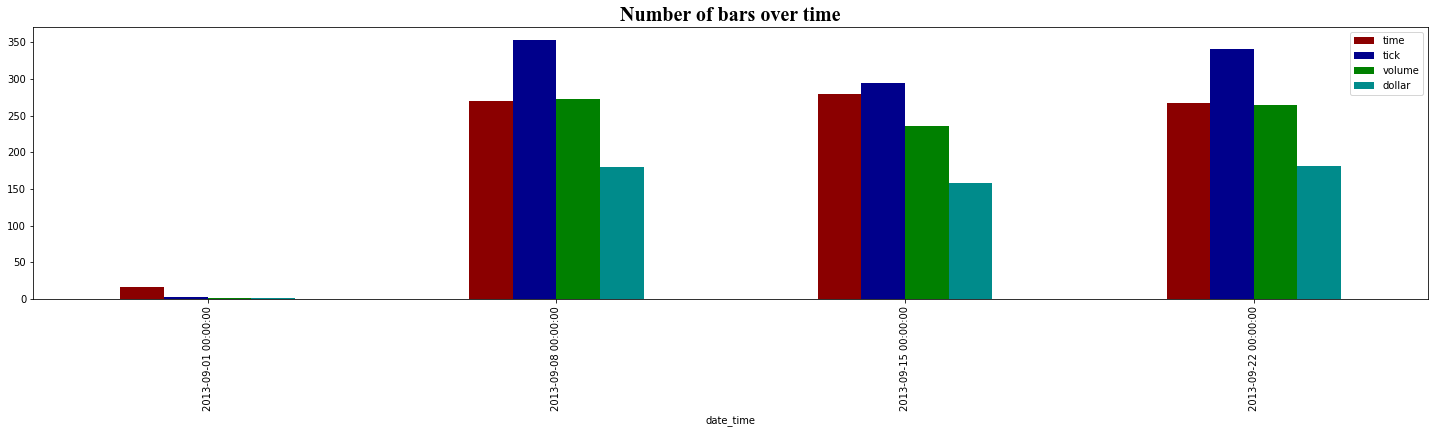

In [71]:
# Plot Number of Bars Over Time
count_df.loc[:, ['time', 'tick', 'volume', 'dollar']].plot(kind='bar', figsize=[25, 5], color=('darkred', 'darkblue', 'green', 'darkcyan'))
plt.title('Number of bars over time', loc='center', fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.show()

In [73]:
# Calculate log returns
time_returns = np.log(time_bars['close']).diff().dropna()
tick_returns = np.log(tick_bars['close']).diff().dropna()
volume_returns = np.log(volume_bars['close']).diff().dropna()
dollar_returns = np.log(dollar_bars['close']).diff().dropna()

In [74]:
print('Test Statistics:')
print('Time:', '\t', int(stats.jarque_bera(time_returns)[0]))
print('Tick:', '\t', int(stats.jarque_bera(tick_returns)[0]))
print('Volume: ', int(stats.jarque_bera(volume_returns)[0]))
print('Dollar: ', int(stats.jarque_bera(dollar_returns)[0]))

Test Statistics:
Time: 	 86833371
Tick: 	 12151
Volume:  9107
Dollar:  5931


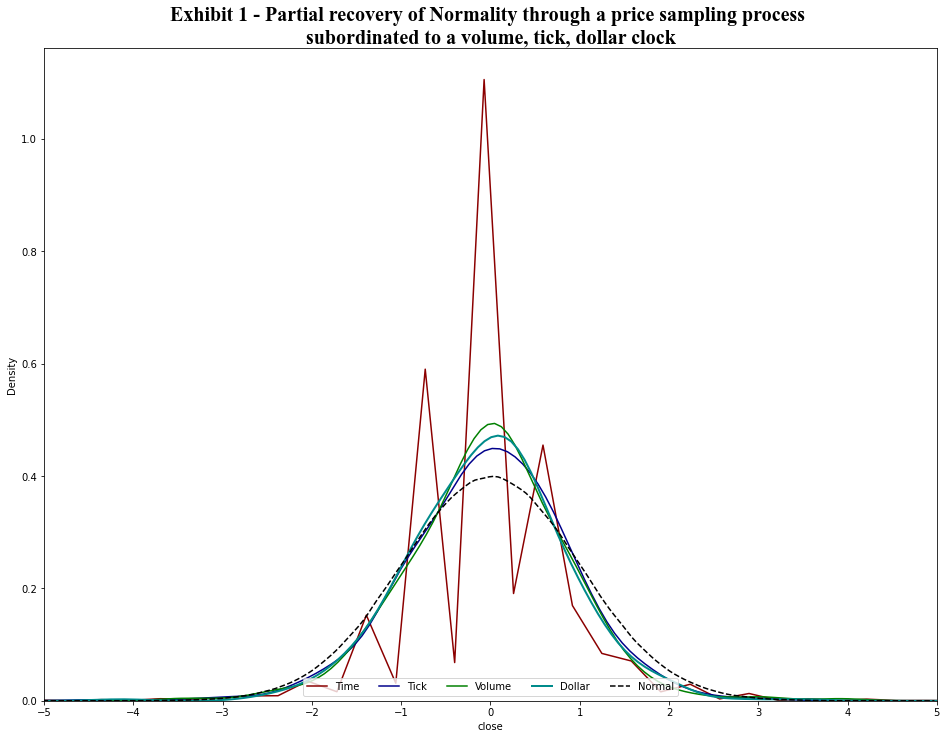

In [75]:
# Calculate the differences
time_diff = time_returns
tick_diff = tick_returns
volume_diff = volume_returns
dollar_diff = dollar_returns

# Standardize the data
time_standard = (time_diff - time_diff.mean()) / time_diff.std()
tick_standard = (tick_diff - tick_diff.mean()) / tick_diff.std()
volume_standard = (volume_diff - volume_diff.mean()) / volume_diff.std()
dollar_standard = (dollar_diff - dollar_diff.mean()) / dollar_diff.std()

# Plot the Distributions
plt.figure(figsize=(16,12))
sns.kdeplot(time_standard, label="Time", color='darkred')
sns.kdeplot(tick_standard, label="Tick", color='darkblue')
sns.kdeplot(volume_standard, label="Volume", color='green')
sns.kdeplot(dollar_standard, label="Dollar", linewidth=2, color='darkcyan')
sns.kdeplot(np.random.normal(size=1000000), label="Normal", color='black', linestyle="--")

plt.xticks(range(-5, 6))
plt.legend(loc=8, ncol=5)
plt.title('Exhibit 1 - Partial recovery of Normality through a price sampling process \nsubordinated to a volume, tick, dollar clock',
          loc='center', fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.xlim(-5, 5)
plt.show()